# Frozen Lake


#### Import all requirements

In [1]:
import gym

In [2]:
import torch
import time
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import random

In [106]:
og_4x4 = ['SFFF',
'FHFH',
'FFFH',
'HFFG']

In [107]:

env = gym.make('FrozenLakeNotSlippery-v0', is_slippery=False, desc = og_4x4)


# visualize 4x4 frozen lake
env.render()


SFFF
FHFH
FFFH
HFFG


In [108]:
# Total number of States and Actions
n_states = env.observation_space.n
n_actions = env.action_space.n
n_rows = 4
n_cols = 4
print( "States = ", n_states)
print( "Actions = ", n_actions)

States =  16
Actions =  4


In [109]:
# Start with 80% random actions to explore the environment
# exploration decays with each timestep by a factor of 0.999 until it hits 10% exploration rate 

epsilon = 0.8
epsilon_final = 0.1
epsilon_decay = 0.999

In [110]:
gamma = 0.90 # discount factor
learning_rate = 0.9 #how important is the difference between q-val from q-table and what's observed

#### Initialize Q-table

In [45]:
import pandas as pd

In [111]:
Q = pd.DataFrame(np.zeros((16,4)))

In [112]:
##assign index to each state using state-matrix

state_matrix = np.arange(0,16).reshape(4,4)
state_matrix

def rowsandcols(state):
  ''' input: state returned by env
      output: location of state as (row,col) tuple'''
  return int(np.where(state_matrix ==state)[0]), int(np.where(state_matrix ==state)[1])

In [113]:
num_episodes = 1000
steps_total = [] # store number of steps taken in each episode
rewards_total = [] #store reward obtained for each episode
epsilon_total = [] #store epsilon obtained at the end of each episode

## q learning

In [114]:
for i_episode in range(num_episodes):
    
    # resets the environment
    state = env.reset()
    step = 0
    reward = 0

    while True:
        
        step += 1
        
        
        
        ## generating a random num
        random_for_epsilon = np.random.rand()
        
        ## if random num lesser or equal to epsilon, then select random action
        if random_for_epsilon <= epsilon:     
            action = env.action_space.sample()   ##replace with choose_random_action(state) for action with restrictions
        
        ## else update q-vals for given state with infitismly small random nums and select argmax(a) for Q(s,a)
        else: 
            Q.loc[state] += np.random.rand(n_actions,)/1000
            action =  np.argmax(Q.loc[state])
        
        
        ## as epsilon decays with more timesteps, the prob. of selecting a random val < e decays --> more likely to exploit.     
        if epsilon > epsilon_final:
            epsilon *= epsilon_decay
        
        ## env gives reward and next state and whether we've reached terminal state upon taking action at current state.. 
        new_state, _ , done, info = env.step(action)


        ##if you want reward penalized at for each timestep
        if og_4x4[rowsandcols(new_state)[0]][rowsandcols(new_state)[1]]== 'H':
          reward -= 2
        elif og_4x4[rowsandcols(new_state)[0]][rowsandcols(new_state)[1]]== 'F':
          reward -= 1 
        elif og_4x4[rowsandcols(new_state)[0]][rowsandcols(new_state)[1]]== 'S':
          reward -= 1
        else:
          reward += 15



        # filling the Q Table - 
        Q.loc[state][action] = (1- learning_rate)*Q.loc[state][action] + learning_rate*(reward + gamma * np.max(Q.loc[new_state]))
        
        # Setting new state for next action
        state = new_state
        
        # env.render()
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            epsilon_total.append(epsilon)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step, epsilon))
            break

Episode: 0 Reward: -4 Steps Taken: 3
Episode: 10 Reward: -5 Steps Taken: 4
Episode: 20 Reward: -8 Steps Taken: 7
Episode: 30 Reward: -4 Steps Taken: 3
Episode: 40 Reward: -3 Steps Taken: 2
Episode: 50 Reward: -4 Steps Taken: 3
Episode: 60 Reward: -3 Steps Taken: 2
Episode: 70 Reward: -3 Steps Taken: 2
Episode: 80 Reward: -3 Steps Taken: 2
Episode: 90 Reward: -8 Steps Taken: 7
Episode: 100 Reward: -3 Steps Taken: 2
Episode: 110 Reward: -7 Steps Taken: 6
Episode: 120 Reward: -3 Steps Taken: 2
Episode: 130 Reward: -5 Steps Taken: 4
Episode: 140 Reward: -5 Steps Taken: 4
Episode: 150 Reward: -7 Steps Taken: 6
Episode: 160 Reward: -3 Steps Taken: 2
Episode: 170 Reward: -3 Steps Taken: 2
Episode: 180 Reward: -10 Steps Taken: 9
Episode: 190 Reward: -3 Steps Taken: 2
Episode: 200 Reward: -5 Steps Taken: 4
Episode: 210 Reward: -13 Steps Taken: 12
Episode: 220 Reward: -3 Steps Taken: 2
Episode: 230 Reward: -3 Steps Taken: 2
Episode: 240 Reward: -3 Steps Taken: 2
Episode: 250 Reward: -9 Steps Tak

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0.5, 1.0, '4x4')

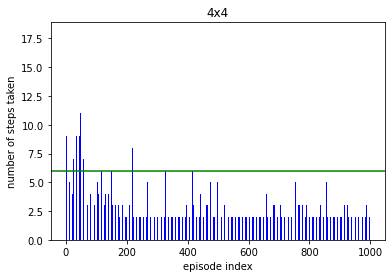

In [115]:
plt.axhline(y=6, color='green', linestyle='-')
plt.bar(np.arange(0, 1000), steps_total, 
        width = 0.4, color = 'blue')
plt.xlabel('episode index')
plt.ylabel('number of steps taken')
plt.title('4x4')

Text(0, 0.5, 'reward')

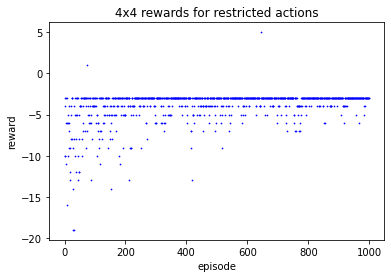

In [120]:

plt.scatter(np.arange(0, 1000), rewards_total, s = 0.5, color = 'blue')
plt.title('4x4 rewards for restricted actions')
plt.xlabel('episode')
plt.ylabel('reward')

In [119]:
Q

,0,1,2,3
0,-5.022586,-3.699968,-6.383769,-6.128808
1,-5.599460,-5.699954,-11.466937,-6.571508
2,-16.884579,-10.060795,-14.505844,-15.792738
3,-15.358793,-12.239366,-21.065182,-16.291595
4,-4.844728,-6.418678,-2.999964,-5.354415
5,0.000000,0.000000,0.000000,0.000000
6,-8.686936,-11.417545,-6.080824,-18.450415
7,0.000000,0.000000,0.000000,0.000000
8,-8.842767,-4.090117,-9.340489,-6.643465
9,-21.516233,-9.475307,-15.478785,-6.803937
